## NA and Outlier analysis

In [1]:
# DAL Library
# version 2.1

source("../examples.R")
source("../graphics.R")


#loading DAL
load_dal() # see ../examples.R 

Loading required package: dal

Warning message:
“replacing previous import ‘FNN::knn.cv’ by ‘class::knn.cv’ when loading ‘dal’”
Warning message:
“replacing previous import ‘FNN::knn’ by ‘class::knn’ when loading ‘dal’”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘dplyr::combine’ by ‘randomForest::combine’ when loading ‘dal’”
Warning message:
“replacing previous import ‘Matrix::cov2cor’ by ‘stats::cov2cor’ when loading ‘dal’”
Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘dal’”
Warning message:
“replacing previous import ‘dplyr::lag’ by ‘stats::lag’ when loading ‘dal’”
Warning message:
“replacing previous import ‘Matrix::toeplitz’ by ‘stats::toeplitz’ when loading ‘dal’”
Warning message:
“replacing previous import ‘Matrix::update’ by ‘stats::update’ when loading ‘dal’”

Attaching package: ‘dal’


The following object is masked from ‘package:sta

In [2]:
# basic setup for plotting
loadlibrary("ggplot2")
loadlibrary("dplyr")
loadlibrary("reshape")

# This function is used only to set graphics size in this notebook. 
plot.size(10, 5) #see graphics.R

# setting the font size for all charts
font <- theme(text = element_text(size=16))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: reshape


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




### NA removal

In [3]:
iris <- datasets::iris
head(iris)
nrow(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 150

In [4]:
#introducing a NA to remove
iris.fake <- iris
iris.fake$Sepal.Length[2] <- NA
head(iris.fake)
nrow(iris.fake)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,NA,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 150

### removing NA tuples

In [5]:
iris.na.omit <- na.omit(iris.fake)
head(iris.na.omit)
nrow(iris.na.omit)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


[1] 149

### Outlier removal
The following class uses box-plot definition for outliers.

An outlier is a value that is below than $Q_1 - 1.5 \cdot IQR$ or higher than $Q_3 + 1.5 \cdot IQR$.

The class remove outliers for numeric attributes. 

### visual inspection of outliers using boxplot function

Using Species as id variables



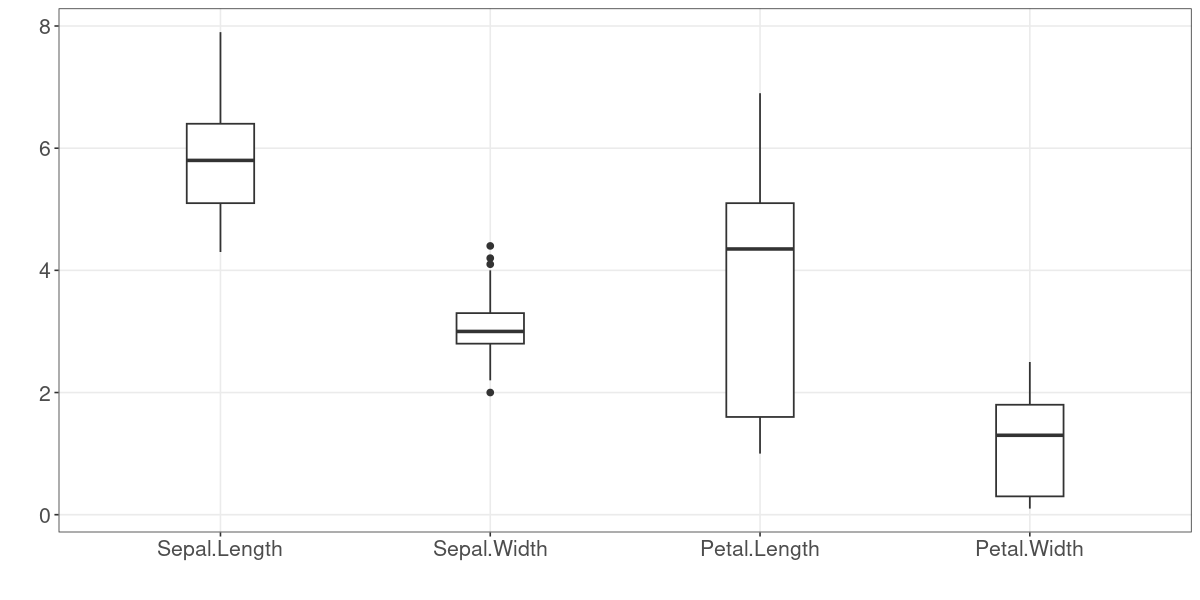

In [6]:
#plot boxplot
plot.boxplot(iris) + font

### removing outliers of a data frame

In [7]:
# code for outlier removal
out_obj <- outliers() # class for outlier analysis
out_obj <- fit(out_obj, iris) # computing boundaries
iris.clean <- transform(out_obj, iris) # returning cleaned dataset

# inspection of cleaned dataset
head(iris.clean)
nrow(iris.clean)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 146

Using Species as id variables



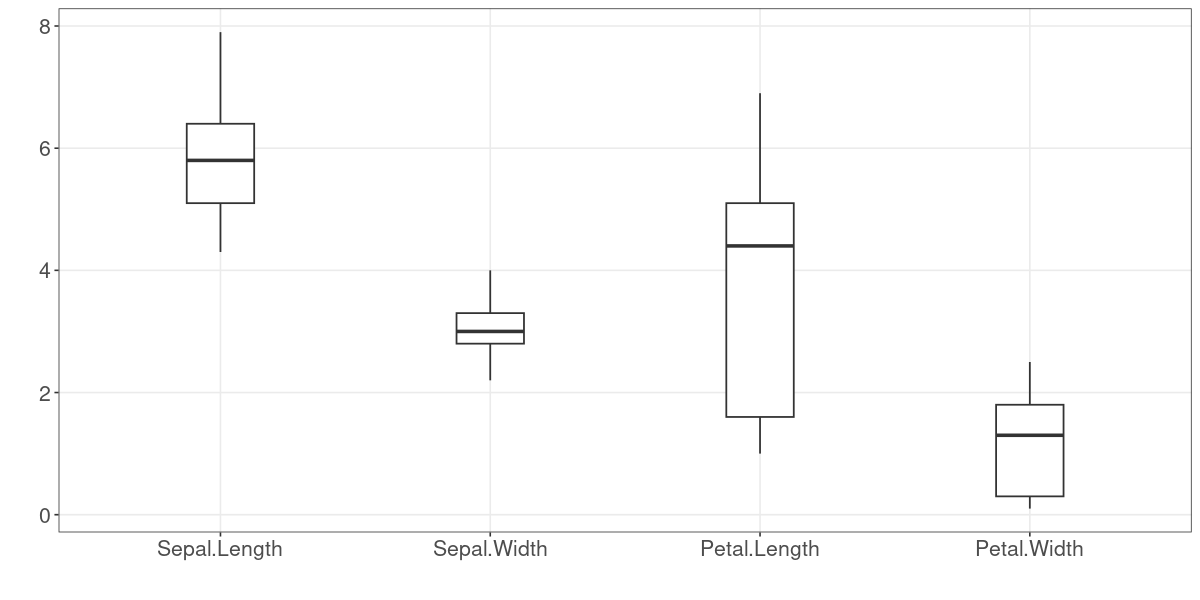

In [8]:
plot.boxplot(iris.clean) + font

Visualizing the actual outliers

In [9]:
idx <- attr(iris.clean, "idx")
print(table(idx))
iris.outliers <- iris[idx,]
head(iris.outliers)

idx
FALSE  TRUE 
  146     4 


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
16,5.7,4.4,1.5,0.4,setosa
33,5.2,4.1,1.5,0.1,setosa
34,5.5,4.2,1.4,0.2,setosa
61,5.0,2.0,3.5,1.0,versicolor
